In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report

In [5]:
df=pd.read_csv(r"C:\Users\91788\Downloads\archive\diabetes.csv")

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [7]:
df.shape

(768, 9)

In [9]:
df["Outcome"].unique()

array([1, 0], dtype=int64)

### 1 -> indicating Diabetic person
### 0 -> indicating Non-Diabetic person

In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:>

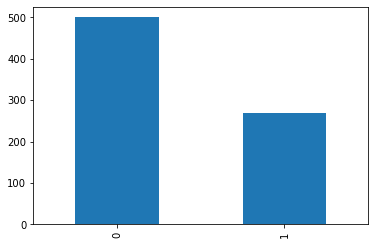

In [15]:
df["Outcome"].value_counts().plot(kind="bar")

In [16]:
for column in df.columns:
    if column!="Outcome":
        print(column,"has :-> {} zeros".format(df[df[column]==0].shape[0]))

Pregnancies has :-> 111 zeros
Glucose has :-> 5 zeros
BloodPressure has :-> 35 zeros
SkinThickness has :-> 227 zeros
Insulin has :-> 374 zeros
BMI has :-> 11 zeros
DiabetesPedigreeFunction has :-> 0 zeros
Age has :-> 0 zeros


### Replacing zero values by median values of respective column

In [18]:
for col in df.columns:
    if col!="Outcome" and col!="DiabetesPedigreeFunction" and col!="Age":
        df[col]=np.where(df[col]==0,df[col].median(),df[col])

In [19]:
for column in df.columns:
    if column!="Outcome":
        print(column,"has :-> {} zeros".format(df[df[column]==0].shape[0]))

Pregnancies has :-> 0 zeros
Glucose has :-> 0 zeros
BloodPressure has :-> 0 zeros
SkinThickness has :-> 0 zeros
Insulin has :-> 0 zeros
BMI has :-> 0 zeros
DiabetesPedigreeFunction has :-> 0 zeros
Age has :-> 0 zeros


### Train Test Split

In [21]:
X=df.iloc[:,:8]
Y=df["Outcome"]
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

### 1.Logistic Regression

In [27]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\91788\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
print("Accuracy on test set:",lr.score(x_test,y_test))

Accuracy on test set: 0.7359307359307359


In [33]:
pred_lr=lr.predict(x_test)
print(confusion_matrix(y_test,pred_lr))

[[127  17]
 [ 44  43]]


In [34]:
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.74      0.88      0.81       144
           1       0.72      0.49      0.59        87

    accuracy                           0.74       231
   macro avg       0.73      0.69      0.70       231
weighted avg       0.73      0.74      0.72       231



### 2.Decision Tree

In [35]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [36]:
print("Accuracy on test set:",dt.score(x_test,y_test))

Accuracy on test set: 0.7186147186147186


In [37]:
pred_dt=dt.predict(x_test)
print(confusion_matrix(y_test,pred_dt))

[[120  24]
 [ 41  46]]


In [38]:
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79       144
           1       0.66      0.53      0.59        87

    accuracy                           0.72       231
   macro avg       0.70      0.68      0.69       231
weighted avg       0.71      0.72      0.71       231



### Result is Logistic Regression gives highest accuracy and highest recall